To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img


2024-03-12 17:43:35.384381: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 17:43:35.425217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 17:43:35.425722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 17:43:36.252845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train")
data_dir_test = pathlib.Path('/home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Test')

print(data_dir_train)

/home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
seed=123

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_width,img_height), 
                                                               label_mode='categorical',
                                                               seed=seed,
                                                               subset="training",
                                                               validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                            batch_size=32,
                                                            image_size=(img_width,img_height),
                                                            label_mode='categorical',
                                                            seed=seed,
                                                            subset="validation",
                                                            validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Found 2239 files belonging to 9 classes.


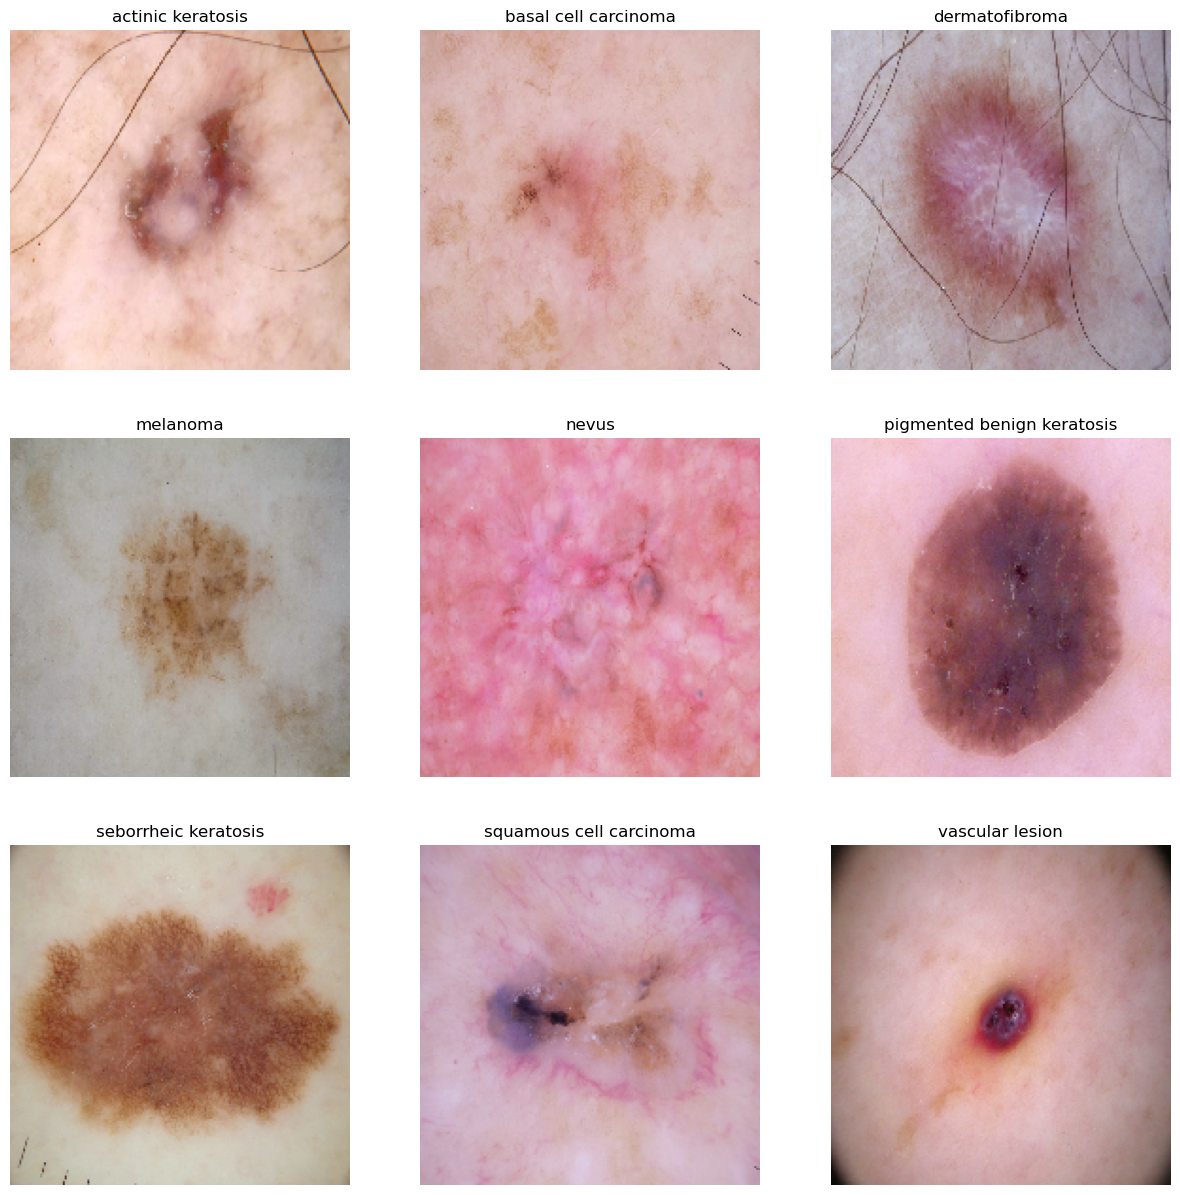

In [9]:
import matplotlib.pyplot as plt


image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                    batch_size=batch_size,
                                                                    image_size=(img_width,img_height),
                                                                    label_mode='categorical',
                                                                    seed=seed)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`



In [11]:
### Your code goes here

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
56/56 [==============================] - 34s 536ms/step - loss: 2.1204 - accuracy: 0.2182 - val_loss: 1.8929 - val_accuracy: 0.2461
Epoch 2/10
56/56 [==============================] - 36s 641ms/step - loss: 1.8518 - accuracy: 0.3242 - val_loss: 1.7217 - val_accuracy: 0.3647
Epoch 3/10
56/56 [==============================] - 36s 650ms/step - loss: 1.6298 - accuracy: 0.4235 - val_loss: 1.5005 - val_accuracy: 0.4653
Epoch 4/10
56/56 [==============================] - 41s 732ms/step - loss: 1.5508 - accuracy: 0.4581 - val_loss: 1.4754 - val_accuracy: 0.5056
Epoch 5/10
56/56 [==============================] - 35s 629ms/step - loss: 1.4463 - accuracy: 0.4916 - val_loss: 1.3704 - val_accuracy: 0.5324
Epoch 6/10
56/56 [==============================] - 41s 730ms/step - loss: 1.3899 - accuracy: 0.5028 - val_loss: 1.4225 - val_accuracy: 0.5414
Epoch 7/10
56/56 [==============================] - 38s 672ms/step - loss: 1.3352 - accuracy: 0.5240 - val_loss: 1.3245 - val_accuracy: 0.5324

### Visualizing training results

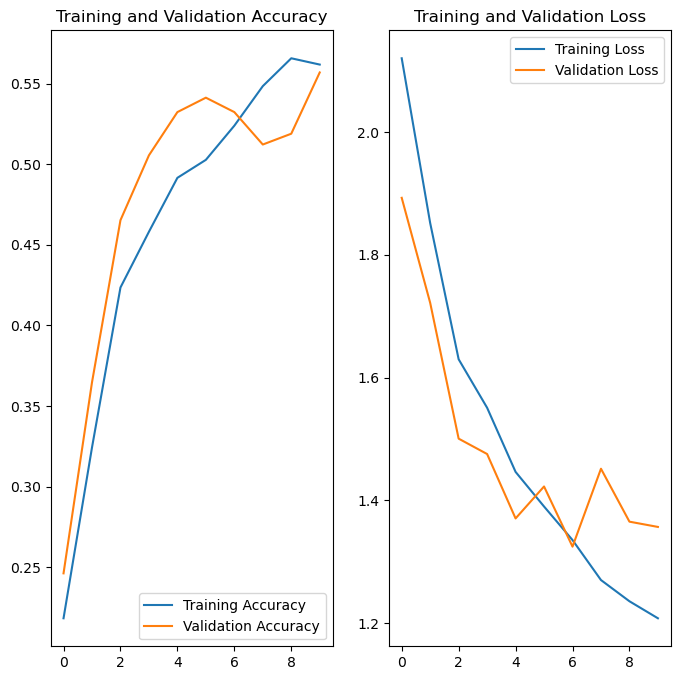

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### With Epoch 20 and no augmentation it gave poor performance. 0.5619 accuracy and 0.55 validation accuracy

                        Class  No. of Image
0             vascular lesion           139
1        basal cell carcinoma           376
2        seborrheic keratosis            77
3  pigmented benign keratosis           462
4           actinic keratosis           114
5                    melanoma           438
6                       nevus           357
7              dermatofibroma            95
8     squamous cell carcinoma           181


<Axes: xlabel='No. of Image', ylabel='Class'>

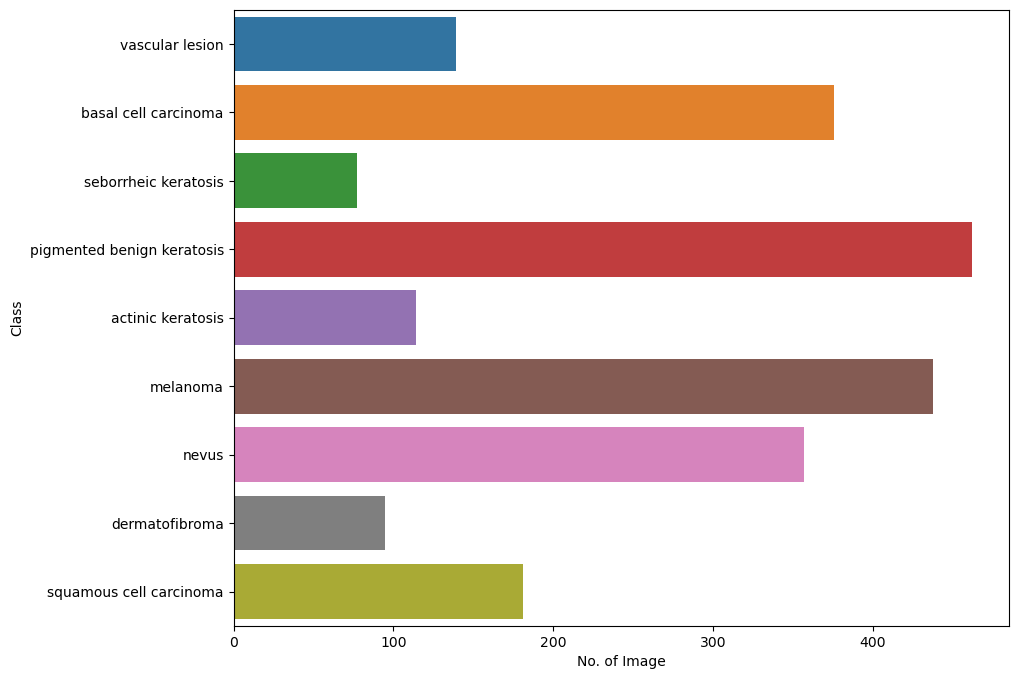

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
print(df)


#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")





#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

### - Which class has the least number of samples?  => seborrheic keratosis 
### - Which classes dominate the data in terms proportionate number of samples? => pigmented benign keratosis and melanoma 

In [20]:

path_to_training_dataset="/home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE9516ACC50>: 100%


Initialised with 376 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7


Initialised with 95 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE90B789A10>: 100%


Initialised with 438 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7


Initialised with 357 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FE90B76CD10>: 100%


Initialised with 462 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE90B797890>: 100%


Initialised with 77 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE9510F0510>: 100


Initialised with 181 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE90B7B3410>: 100%


Initialised with 139 image(s) found.
Output directory set to /home/gurupreet_singh/Documents/Upgrade_CNN/MelanomaAssignment/CNN_assignment/Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE92C9C7A50>: 100%


In [34]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_width,img_height), 
                                                               label_mode='categorical',
                                                               seed=seed,
                                                               subset="training",
                                                               validation_split=0.2)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_width,img_height), 
                                                               label_mode='categorical',
                                                               seed=seed,
                                                               subset="validation",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Todo:
### Create the model, compile and train the model


In [46]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here


model_20 = Sequential()

model_20.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model_20.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model_20.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model_20.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model_20.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model_20.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model_20.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model_20.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model_20.add(layers.Flatten())

#Dense Layer
model_20.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model_20.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model_20.add(layers.Dense(len(class_names),activation='softmax'))



### Compiling the model

In [47]:
model_20.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


### Training the model

In [48]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_20.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
169/169 [==============================] - 104s 607ms/step - loss: 1.8299 - accuracy: 0.3019 - val_loss: 1.4662 - val_accuracy: 0.4410
Epoch 2/20
169/169 [==============================] - 125s 738ms/step - loss: 1.4863 - accuracy: 0.4397 - val_loss: 1.6034 - val_accuracy: 0.4395
Epoch 3/20
169/169 [==============================] - 125s 735ms/step - loss: 1.3738 - accuracy: 0.4850 - val_loss: 1.2565 - val_accuracy: 0.5256
Epoch 4/20
169/169 [==============================] - 129s 759ms/step - loss: 1.2368 - accuracy: 0.5478 - val_loss: 1.1407 - val_accuracy: 0.5612
Epoch 5/20
169/169 [==============================] - 152s 897ms/step - loss: 1.1318 - accuracy: 0.5777 - val_loss: 1.4657 - val_accuracy: 0.4543
Epoch 6/20
169/169 [==============================] - 149s 879ms/step - loss: 1.0538 - accuracy: 0.6100 - val_loss: 0.9890 - val_accuracy: 0.6303
Epoch 7/20
169/169 [==============================] - 141s 831ms/step - loss: 0.9245 - accuracy: 0.6562 - val_loss: 1.0408 -

### After augmentation and Epoch -20 , There is a significant improvement in the Train Accuracy :- 86% and Validation Accuracy to 80%

### Visualizing the results

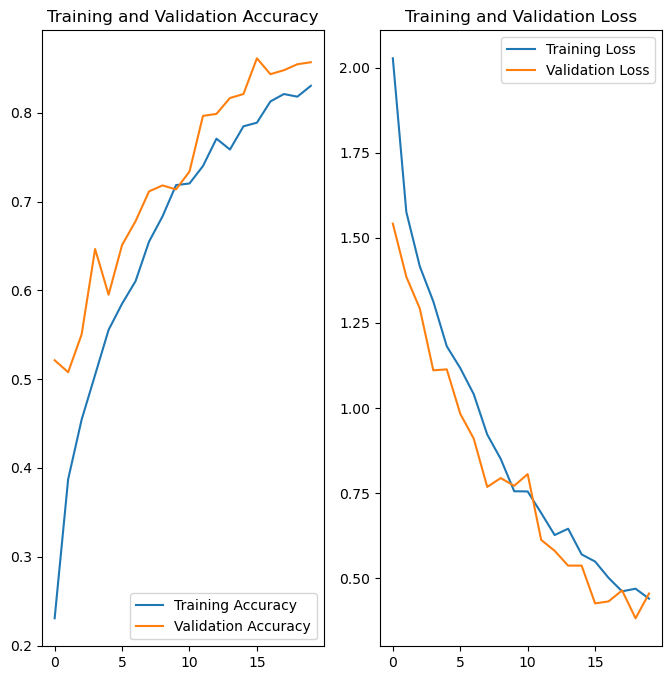

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Finding:- there is a significant improvement in the performance of the Model, It gave significant result of accuray 0.86 to validation error 0.80. With reduction in loss of information

#### **Todo:**  Train your model

In [40]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 123s 722ms/step - loss: 0.3864 - accuracy: 0.8544 - val_loss: 0.7455 - val_accuracy: 0.7921
Epoch 2/30
169/169 [==============================] - 122s 721ms/step - loss: 0.3884 - accuracy: 0.8557 - val_loss: 0.7697 - val_accuracy: 0.7647
Epoch 3/30
169/169 [==============================] - 134s 791ms/step - loss: 0.3598 - accuracy: 0.8650 - val_loss: 0.7163 - val_accuracy: 0.7936
Epoch 4/30
169/169 [==============================] - 137s 810ms/step - loss: 0.3153 - accuracy: 0.8869 - val_loss: 1.2691 - val_accuracy: 0.6778
Epoch 5/30
169/169 [==============================] - 122s 716ms/step - loss: 0.3306 - accuracy: 0.8737 - val_loss: 0.7963 - val_accuracy: 0.7751
Epoch 6/30
169/169 [==============================] - 122s 716ms/step - loss: 0.3740 - accuracy: 0.8654 - val_loss: 0.6633 - val_accuracy: 0.8099
Epoch 7/30
169/169 [==============================] - 122s 718ms/step - loss: 0.2921 - accuracy: 0.8852 - val_loss: 0.6921 -

#### **Todo:**  Visualize the model results

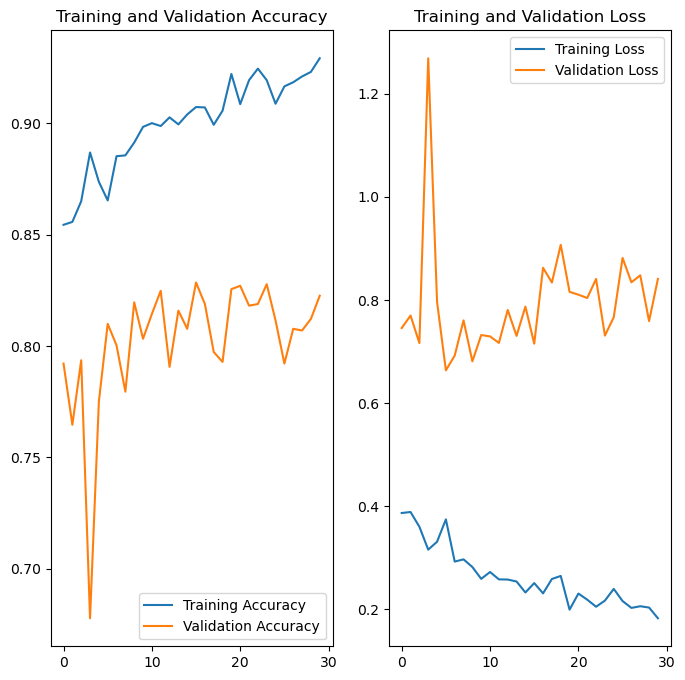

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1/1 [==============================] - 0s 21ms/step
Actual Class nevus
Predictive Class nevus


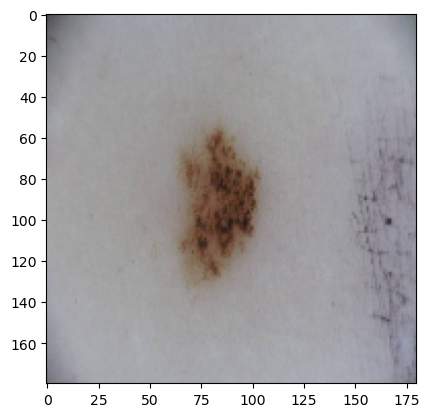

In [61]:
no=4

from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[no], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_20.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[no] +'\n'+ "Predictive Class "+pred_class )

### After Augmentation, Handling class imbalance and Setting Hyperparameter Epoch to 20 gave the best results , With Training and Validation accuracy of 86% and 80% respectively